**exercises with statsmodels OLS and WLS**
*created by fbb November 2018*


In [1]:
from __future__ import print_function, division
import pylab as pl

import os
import json

import statsmodels.api as sm
import statsmodels.formula.api as smf
#s = json.load(open(os.getenv('PUI2018')+"/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)
    


# create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

use the functions created above

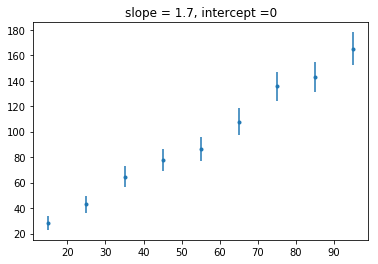

In [3]:
random.seed(799)
x = [15,25,35,45,55,65,75,85,95]
slope=1.7
all_x = np.array(x)
all_y = line(slope, all_x, errors=errors)
plt.errorbar(all_x, all_y, yerr=errors(all_y),fmt='.')
plt.title('slope = 1.7, intercept =0')

# print y, x, and the result of applying statsmodels.api.add_constant() to x

In [4]:
print ("y:")
print(all_y)
print ("x:")
print(all_x) 

print ('\nAfter applying statsmodels.api.add_constant() to x:')
sm.add_constant(all_x) 

y:
[  28.2237396    42.92529025   64.73601335   77.93960257   86.46364785
  107.84602985  135.44750784  142.68554082  165.1325819 ]
x:
[15 25 35 45 55 65 75 85 95]

After applying statsmodels.api.add_constant() to x:


array([[  1.,  15.],
       [  1.,  25.],
       [  1.,  35.],
       [  1.,  45.],
       [  1.,  55.],
       [  1.,  65.],
       [  1.,  75.],
       [  1.,  85.],
       [  1.,  95.]])

# use statsmodels.api.OLS to fit x and y 
- *the wrong way*: by passing x as exogenous variable
- *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable

print the model summary for each and discuss the differences

In [5]:
#THE WRONG WAY
smfit_1 = smf.OLS(all_y, all_x).fit()
smfit_1.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/scipy/stats/stats.py:1326: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     4745.
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           2.20e-12
Time:                        19:24:28   Log-Likelihood:                -25.858
No. Observations:                   9   AIC:                             53.72
Df Residuals:                       8   BIC:                             53.91
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.7159      0.025     68.882      0.000         1.658     1.773
==============================================================================
Omnibus:                        0.393   Durbin-Watson:                   2.250
Prob(Omnibus):                  0.822   Jarque-Bera (JB):                0.362
Skew:                          -0.359   Prob(JB):                        0.834
Kurtosis:                       2.329   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
#THE RIGHT WAY
smfit_2 = smf.OLS(all_y, sm.add_constant(all_x)).fit()
smfit_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     745.1
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           2.27e-08
Time:                        19:24:28   Log-Likelihood:                -25.787
No. Observations:                   9   AIC:                             55.57
Df Residuals:                       7   BIC:                             55.97
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.2608      3.778      0.334      0.748        -7.672    10.193
x1             1.6971      0.062     27.296      0.000         1.550     1.844
==============================================================================
Omnibus:                        0.324   Durbin-Watson:                   2.287
Prob(Omnibus):                  0.851   Jarque-Bera (JB):                0.223
Skew:                          -0.282   Prob(JB):                        0.895
Kurtosis:                       2.474   Cond. No.                         143.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# plot the data (as points) and both statsmodels fits

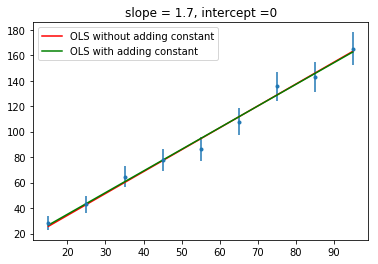

In [7]:
plt.errorbar(all_x, all_y, yerr=errors(all_y),fmt='.')
#pl.plot(x, smfit_2.fittedvalues, '-', label="sm.OLS")
pl.plot(x, smfit_1.fittedvalues, '-', label="OLS without adding constant", color = 'red')
pl.plot(x, smfit_2.fittedvalues, '-', label="OLS with adding constant", color = 'green')
pl.legend()
plt.title('slope = 1.7, intercept =0')

#### Caption: the two fits (one with adding constant to x one without) are close to each other but are slightly different when fitting the data with the intercept equal to zero, the two fit lines basically overlap each other.


# create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

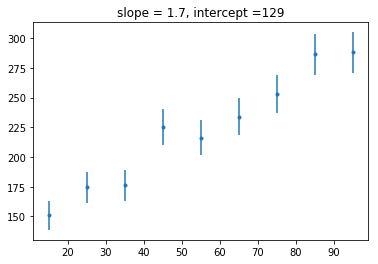

In [8]:
intercept= 129
all_y_intercept = line(slope, all_x, intercept, errors=errors)
plt.errorbar(all_x, all_y_intercept, yerr=errors(all_y_intercept),fmt='.')
plt.title('slope = 1.7, intercept =129')

# repeat step 3

In [9]:
#THE WRONG WAY
smfit_3 = smf.OLS(all_y_intercept, all_x).fit()
smfit_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     130.4
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           3.13e-06
Time:                        19:24:29   Log-Likelihood:                -48.781
No. Observations:                   9   AIC:                             99.56
Df Residuals:                       8   BIC:                             99.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             3.6321      0.318     11.419      0.000         2.899     4.366
==============================================================================
Omnibus:                        1.006   Durbin-Watson:                   0.201
Prob(Omnibus):                  0.605   Jarque-Bera (JB):                0.609
Skew:                           0.001   Prob(JB):                        0.738
Kurtosis:                       1.726   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
#THE RIGHT WAY
smfit_4 = smf.OLS(all_y_intercept, sm.add_constant(all_x)).fit()
smfit_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     161.5
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           4.32e-06
Time:                        19:24:29   Log-Likelihood:                -32.912
No. Observations:                   9   AIC:                             69.82
Df Residuals:                       7   BIC:                             70.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        126.7272      8.338     15.200      0.000       107.012   146.442
x1             1.7441      0.137     12.710      0.000         1.420     2.069
==============================================================================
Omnibus:                        2.923   Durbin-Watson:                   3.095
Prob(Omnibus):                  0.232   Jarque-Bera (JB):                1.331
Skew:                           0.933   Prob(JB):                        0.514
Kurtosis:                       2.743   Cond. No.                         143.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# repeat step 4

array([  1.92620559,   4.04682061,  11.67641461,  19.74230172,
         6.35322017,   6.15586516,   4.47044414,  11.25024395,   4.45721661])

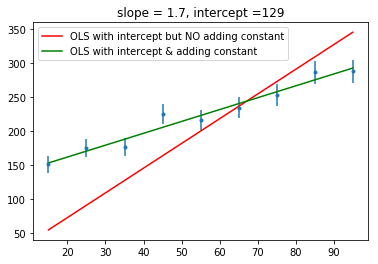

In [11]:
plt.errorbar(all_x, all_y_intercept, yerr=errors(all_y_intercept),fmt='.')
pl.plot(x, smfit_3.fittedvalues, '-', label="OLS with intercept but NO adding constant", color = 'red')
pl.plot(x, smfit_4.fittedvalues, '-', label="OLS with intercept & adding constant", color = 'green')
pl.legend()
plt.title('slope = 1.7, intercept =129')
abs(smfit_4.resid)

#### Caption: the two fits (one with adding constant to x one without) look much different now on fitting the data with the intercept equal to 129. From the plot we can tell that the OLS fit with adding constant to X fits much better than the other one.

# now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the _inverse_ (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

In [12]:
smfit_5 = smf.WLS(all_y_intercept, sm.add_constant(all_x),weights=1/(errors(all_y))).fit()
smfit_5.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.961
Model:                            WLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     171.5
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           3.53e-06
Time:                        19:24:29   Log-Likelihood:                -32.870
No. Observations:                   9   AIC:                             69.74
Df Residuals:                       7   BIC:                             70.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        126.4794      7.258     17.426      0.000       109.317   143.642
x1             1.7488      0.134     13.096      0.000         1.433     2.065
==============================================================================
Omnibus:                        3.093   Durbin-Watson:                   3.155
Prob(Omnibus):                  0.213   Jarque-Bera (JB):                1.250
Skew:                           0.912   Prob(JB):                        0.535
Kurtosis:                       2.906   Cond. No.                         114.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

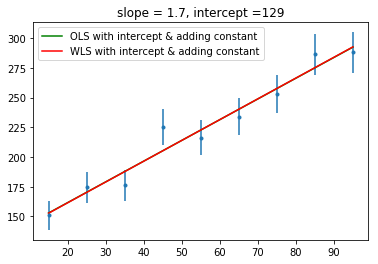

In [13]:
plt.errorbar(all_x, all_y_intercept, yerr=errors(all_y_intercept),fmt='.')
pl.plot(x, smfit_4.fittedvalues, '-', label="OLS with intercept & adding constant", color = 'green')
pl.plot(x, smfit_5.fittedvalues, '-', label="WLS with intercept & adding constant", color = 'red')
pl.legend()
plt.title('slope = 1.7, intercept =129')

Caption: the OLS and WLS fits are similar when fitting the data.

# you can also use other statsmodels functions, for example statsmodels.formula.api which allows to pass an equation
again, make sure that your formula supports an intercept

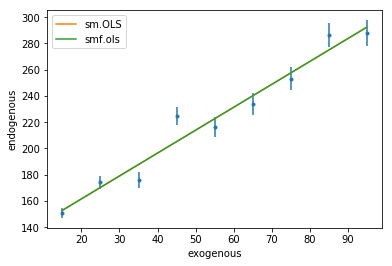

In [14]:
# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
smfmodel = smf.ols('y ~ x + const', data={'x':all_x, 'y':all_y_intercept, 'const':np.ones(len(x))}).fit()
pl.errorbar(all_x, all_y_intercept, yerr=errors(x), fmt='.')
pl.plot(all_x, smfit_4.fittedvalues, '-', label="sm.OLS")
pl.plot(all_x, smfmodel.fittedvalues, '-', label="smf.ols")
pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.legend();